In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
%matplotlib inline
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'

### Задание 1

In [2]:
boston = load_boston()

In [3]:
data = boston["data"]
feature_names = boston["feature_names"]

In [4]:
X = pd.DataFrame(boston["data"], columns=boston["feature_names"])
Y = pd.DataFrame(boston["target"], columns=["price"])

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [7]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_scaled.shape, X_train_tsne.shape

((354, 13), (354, 2))

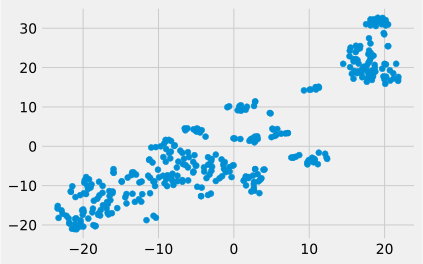

In [8]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2

In [9]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
KFP = kmeans.fit_predict(X_train_scaled)

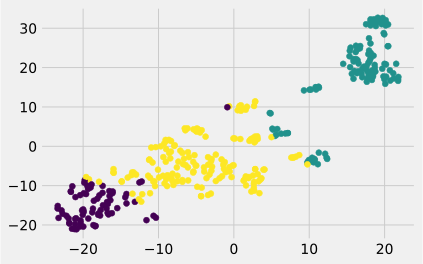

In [13]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=KFP)
plt.show()

In [16]:
print('Кластер 0: {}'.format(Y_train[KFP == 0].mean()))
print('Кластер 1: {}'.format(Y_train[KFP == 1].mean()))
print('Кластер 2: {}'.format(Y_train[KFP == 2].mean()))

Кластер 0: price    28.089189
dtype: float64
Кластер 1: price    16.402632
dtype: float64
Кластер 2: price    25.295783
dtype: float64


In [17]:
print('Кластер 0: {}'.format(X_train.loc[KFP == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[KFP == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[KFP == 2, 'CRIM'].mean()))

Кластер 0: 0.07632851351351352
Кластер 1: 10.10463175438597
Кластер 2: 0.4262868674698794


### Задание 3 

In [18]:
labels_test = kmeans.predict(X_test_scaled)

In [22]:
print('PRICE')
print('Кластер 0: {}'.format(Y_test[labels_test == 0].mean()))
print('Кластер 1: {}'.format(Y_test[labels_test == 1].mean()))
print('Кластер 2: {}'.format(Y_test[labels_test == 2].mean()))
print('CRIM')
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

PRICE
Кластер 0: price    28.627586
dtype: float64
Кластер 1: price    15.87
dtype: float64
Кластер 2: price    22.332877
dtype: float64
CRIM
Кластер 0: 0.06230448275862069
Кластер 1: 11.5153188
Кластер 2: 0.3086328767123288
